# Google Cloud Platform - Using Machine Learning APIs  ).

This is an upgraded Python revision of [this notebook](https://github.com/GoogleCloudPlatform/training-data-analyst/blob/master/CPB100/lab4c/mlapis.ipynb).

This notebook originally was being processed using DataLab on the Google Cloud Platform.  This particular incarnation of the notebook is for running on Google Colaboratory which I am trying out for the first time.

### Security

First things first - we need to authenticate against the Google Cloud APIs.

#### Getting a Google API Credential.

First, visit <a href="http://console.cloud.google.com/apis">API console</a>, choose "Credentials" on the left-hand menu.  Choose "Create Credentials" and generate an API key for your application. You should probably restrict it by IP address to prevent abuse, but for now, just  leave that field blank and delete the API key after trying out this demo.

Then, when you have your key, you will enter it in this first executable cell:

In [1]:
!pip install -q cloudstorage
!pip install -q webapp2
!pip install --upgrade numpy
!pip install six==1.10.0
!pip install -q datalab
!pip install --upgrade gcs-client
!pip install --upgrade google-cloud-storage


    100% |████████████████████████████████| 13.9MB 2.3MB/s 
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
google-colab 0.0.1a1 has requirement six~=1.11.0, but you'll have six 1.10.0 which is incompatible.
  Found existing installation: six 1.11.0
    Uninstalling six-1.11.0:
      Successfully uninstalled six-1.11.0
    100% |████████████████████████████████| 61kB 4.7MB/s 
    100% |████████████████████████████████| 2.1MB 13.3MB/s 
    100% |████████████████████████████████| 61kB 21.7MB/s 
    100% |████████████████████████████████| 102kB 29.1MB/s 
    100% |████████████████████████████████| 430kB 27.6MB/s 
    100% |████████████████████████████████| 163kB 30.7MB/s 
  Running setup.py bdist_wheel for oauth2client ... - \ done
  Stored in directory: /root/.cache/pip/wheels/7a/0b/de/3f8e939ae5f46f030eee5a16bd2dafde9e1e49ea1480b2f983
  Running setup.py bdist_wheel for pycparser ... - \ done
  Stored in direc

In [2]:
import getpass

APIKEY = getpass.getpass()

··········


In [0]:
import sys
import json
import argparse
import googleapiclient.discovery
import pandas as pd
import skimage.data
from skimage import img_as_float
import numpy as np
import pandas as pd
import os
import sys
import tensorflow as tf
import zipfile
import cv2

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

In [0]:
# Authenticate to GCS.
from google.colab import auth
auth.authenticate_user()

# Create the service client.
from googleapiclient.discovery import build
gcs_service = build('storage', 'v1')




In [0]:
BUCKET='wpiopenimageskaggle'


In [0]:
def create_service():
    return googleapiclient.discovery.build('storage', 'v1')


def list_bucket(bucket):
    """Returns a list of metadata of the objects within the given bucket."""
    service = create_service()

    # Create a request to objects.list to retrieve a list of objects.
    fields_to_return = 'nextPageToken,items(name,size,contentType,metadata(my-key))'
    req = service.objects().list(bucket=bucket, fields=fields_to_return, prefix='Boat')  # returns everything. UrbanSound is top dir in bucket

    all_objects = []
    # If you have too many items to list in one request, list_next() will
    # automatically handle paging with the pageToken.
    while req:
        resp = req.execute()
        all_objects.extend(resp.get('items', []))
        req = service.objects().list_next(req, resp)
    return all_objects

raw_json=json.dumps(list_bucket(BUCKET), indent=2)

In [34]:
test=pd.read_json(raw_json)
print(test[1:2])
files=test['name']
test_file=test['name'].apply(str)[1]
print(test_file)

  contentType                       name    size
1  image/jpeg  Boat/002200be72145198.jpg  421363
Boat/002200be72145198.jpg


In [0]:
import io

In [0]:

#filename='imageIds/PointAnnotationsSet256.txt'
filename=test_file
from google.cloud import storage
client = storage.Client('MLRobustClassifier')
bucket = client.get_bucket(BUCKET)
blob = storage.Blob(filename, bucket)
content = blob.download_as_string()
img = Image.open(io.BytesIO(content))

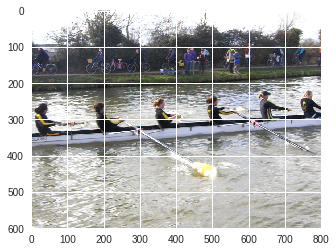

In [59]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

***BELOW THIS POINT IS CODE TRIED THAT DOESN'T WORK KEPT FOR REFERENCE***

In [48]:
from io import BytesIO
from PIL import Image

!pip install io

  Could not find a version that satisfies the requirement io (from versions: )
No matching distribution found for io


In [28]:
import os, sys 
content=os.system('gsutil cp -r gs://wpiopenimageskaggle/imageIds/PointAnnotationsSet256.txt')
print(content)

256


In [0]:
blob = storage.Blob('imageIds/PointAnnotationsSet256.txt', bucket)
destination_file_name='C:\\WPI\\MachineLearning\\FinalProject_Local\\test.txt'
blob.download_to_filename(destination_file_name)

In [0]:
with open("C:\\WPI\\MachineLearning\\FinalProject_Local\\test.txt", "w") as text_file:
    text_file.write(content)

In [22]:
file = open('C:\\WPI\\MachineLearning\\FinalProject_Local\\test.txt','w')
file.write(content)

5

In [0]:
def download_blob(bucket_name, source_blob_name, destination_file_name):
    """Downloads a blob from the bucket."""
    storage_client = storage.Client()
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.blob(source_blob_name)

    blob.download_to_filename(destination_file_name)

    print('Blob {} downloaded to {}.'.format(
        source_blob_name,
        destination_file_name))

In [0]:
def import_images(bucket):
    """Returns a list of metadata of the objects within the given bucket."""
    service = create_service()

    # Create a request to objects.list to retrieve a list of objects.
    fields_to_return = 'nextPageToken,items(name,size,contentType,metadata(my-key))'
    req = service.objects().list(bucket=bucket, fields=fields_to_return, prefix='Boat')  # returns everything. UrbanSound is top dir in bucket

    all_objects = []
    # If you have too many items to list in one request, list_next() will
    # automatically handle paging with the pageToken.
    while req:
        resp = req.execute()
        all_objects.extend(resp.get('items', []))
        req = service.objects().list_next(req, resp)
    return all_objects

In [0]:
files=test['name']
test_file=test['name'].apply(str)[1]
destination_file_name='C:\\WPI\\MachineLearning\\FinalProject_Local\\test.jpg'
download_blob(BUCKET,test_file,destination_file_name)

OSError: ignored

In [0]:
# Initialise a client

from google.cloud import storage

BUCKET = 'wpiopenimageskaggle' 
storage_client = storage.Client("[MLRobustClassifier]")
# Create a bucket object for our bucket
bucket = storage_client.get_bucket(BUCKET)
# Create a blob object from the filepath
blob = bucket.blob("Boat/002200be72145198.jpg")


# Download the file to a destination
destination_file_name='C:\\WPI\\MachineLearning\\FinalProject_Local\\test.jpg'
blob.download_to_filename(destination_file_name)

In [0]:
!pip install beam

In [0]:

import beam
def read_file(input_tuple):
  filepath = input_tuple[0]
  with beam.io.gcp.gcsio.GcsIO().open(filepath, 'r') as f:
    # process f content
    pass

# File paths relative to the bucket
destination_file_name='C:/WPI/MachineLearning/FinalProject_Local/test.jpg'
input_tuples = [(url, destination_file_name)]
p = beam.Pipeline(options = options)
all_files = (p | "Create file path tuple" >> beam.Create(input_tuples))
all_files = (all_files | "Read file" >> beam.FlatMap(read_file))
p.run()

RuntimeError: ignored

In [0]:
def open_local_or_gcs(path, mode):
  """Opens the given path."""
  if path.startswith('gs://'):
    try:
      return gcsio.GcsIO().open(path, mode)
    except Exception as e:  # pylint: disable=broad-except
      # Currently we retry exactly once, to work around flaky gcs calls.
      logging.error('Retrying after exception reading gcs file: %s', e)
      time.sleep(10)
      return gcsio.GcsIO().open(path, mode)
  else:
    return open(path, mode)


In [0]:

url=convert_to_gcp_url(BUCKET,test_file)

Boat/002200be72145198.jpg


In [0]:
def convert_to_gcp_url(BUCKET,test_file):
  gcs_url = 'https://%(bucket)s.storage.googleapis.com/%(file)s' % {'bucket':bucket, 'file':test_file}
  return(gcs_url)
  

In [0]:
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
  with urllib.request.urlopen(url) as file:
      resp=file.read()
      image = np.asarray(bytearray(resp), dtype="uint8")
      image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  return image

In [0]:
#gcs_url=convert_to_gcp_url(BUCKET, test_file)

ct='https://www.scarymommy.com/wp-content/uploads/2018/11/GettyImages-871515794.jpg?w=700'
#print(gcs_url)
#url_to_image(gcs_url)
url_to_image(ct)

NameError: ignored

In [0]:
from apiclient.http import MediaIoBaseDownload

with open('test_f', 'wb') as f:
  request = gcs_service.objects().get(bucket=BUCKET,
                                            object=test_file)
 
  print(request)
  
  #gray=skimage.data.load(val)
  #print(val)
  media = MediaIoBaseDownload(f, request)

  

  done = False
  while not done:
    # _ is a placeholder for a progress object that we ignore.
    # (Our file is small, so we skip reporting progress.)
    _, done = media.next_chunk()
    
print(type(media))
    



<class 'googleapiclient.http.MediaIoBaseDownload'>


In [0]:
# Imports
from google.datalab import Context
from IPython.display import Image

# Define the bucket and and an example image to read
bucket_path = "gs://BUCKET_NAME"
bucket_object = bucket_path + "/google.png"

# List all the objects in your bucket, and read the example image file
%gcs list --objects $bucket_path
%gcs read --object $bucket_object -v img

# Print the image content (see it is in PNG format) and show it
print(type(img))
img
Image(img)

UsageError: Line magic function `%gcs` not found.


In [0]:
# Imports
from google.datalab import Context
from IPython.display import Image

# Define the bucket and and an example image to read
bucket_path = "gs://"+'wpiopenimageskaggle/'
bucket_object = bucket_path + test_file

# List all the objects in your bucket, and read the example image file
%gcs list --objects $bucket_path
%gcs read --object $bucket_object -v img

# Print the image content (see it is in PNG format) and show it
print(type(img))
img
Image(img)

UsageError: Line magic function `%gcs` not found.


In [0]:
def import_image(filename):
    #color=skimage.data.load(filename)
    gray=skimage.data.load(filename)
    print(np.shape(gray))
    gray_m=np.asmatrix(gray)
    return(gray_m)

In [0]:
def create_matrix():
    cwd = os.getcwd()
    path=cwd+"\\images"
    files = os.listdir(path)
    gray_data=[]
    filenames=[]
    for infile in files:
        filenames.append(infile[:-4])
        gray=import_image(path+"\\"+infile)
        gray_data.append(gray)
    gray_data=np.array(gray_data)
    print(np.shape(gray_data))
    #print(gray_data)
    return(filenames, gray_data)

create_matrix()

In [0]:
 
def get_image(bucket,file):
    image_vec=[]
    return image_vec


# usage